<a href="https://colab.research.google.com/github/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_2/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [0]:
%tensorflow_version 2.x
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy import optimize
import math

In [0]:
def f1(x,y):
  return ((2*(x**2)) + (2*(y**2)) - 4)

def f2(x,y):
  return (-(x**2 + y**2))

def f3(x, y):
  return np.sin(np.sqrt(x ** 2 + y ** 2))

def f4(x,y):
  return x*np.exp(-(x**2)-(y**2))
  
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50) 

X,Y = np.meshgrid(x,y)

x1 = np.linspace(-2, 2, 50)
y1 = np.linspace(-2, 2, 50)

X1,Y1 = np.meshgrid(x1,y1)

Z1 = f1(X,Y)
Z2 = f2(X,Y)
Z3 = f3(X,Y)
Z4 = f4(X1,Y1)

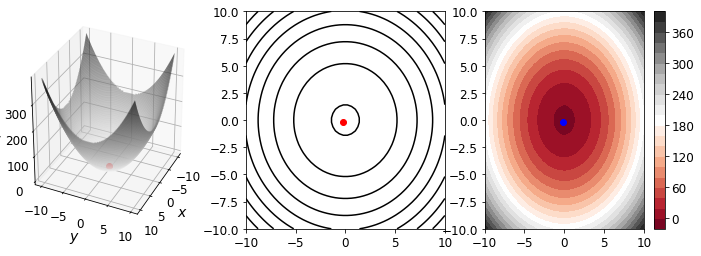

In [0]:
fig = plt.figure(figsize=plt.figaspect(0.33))

ax1 = fig.add_subplot(1,3,1, projection='3d')
ax1.contour3D(X, Y, Z1, 100, alpha= .5, cmap='binary')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

# calc index of min Z value
xmin, ymin = np.unravel_index(np.argmin(Z1), Z1.shape)

# plot maximum point
ax1.plot([X[xmin,ymin]], [Y[xmin,ymin]], [Z1.min()], marker="o", ls="", c="red")
ax1.view_init(30, 25)

ax2 = fig.add_subplot(1,3,2)
plt.contour(X, Y, Z1, colors='black')
plt.plot([X[xmin,ymin]], [Y[xmin,ymin]], marker="o", ls="", c="red")

ax3 = fig.add_subplot(1,3,3)
plt.contourf(X, Y, Z1, 20, cmap='RdGy')
plt.colorbar()
plt.plot([X[xmin,ymin]], [Y[xmin,ymin]], marker="o", ls="", c="blue");

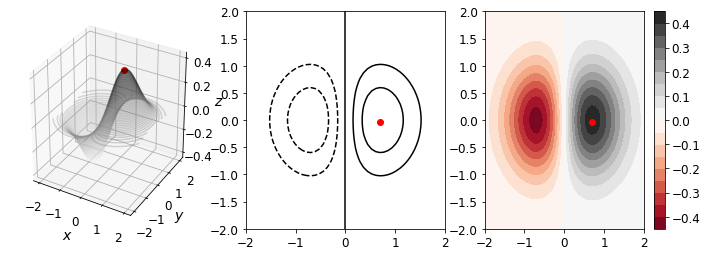

In [0]:
fig = plt.figure(figsize=plt.figaspect(0.33))
ax1 = fig.add_subplot(1,3,1, projection='3d')

ax1.contour3D(X1, Y1, Z4, 100, alpha= .3, cmap='binary')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$');

# calc index of max Z value
xmax, ymax = np.unravel_index(np.argmax(Z4), Z4.shape)

# plot maximum point
ax1.plot([X1[xmin,ymin]], [Y1[xmin,ymin]], [Z4.max()], marker="o", ls="", c="red")

ax1 = fig.add_subplot(1,3,2)
plt.contour(X1, Y1, Z4, colors='black');
plt.plot([X1[xmin,ymin]], [Y1[xmin,ymin]], marker="o", ls="", c="red")

ax1 = fig.add_subplot(1,3,3)
plt.contourf(X1, Y1, Z4, 20, cmap='RdGy')
plt.plot([X1[xmin,ymin]], [Y1[xmin,ymin]], marker="o", ls="", c="red")
plt.colorbar();

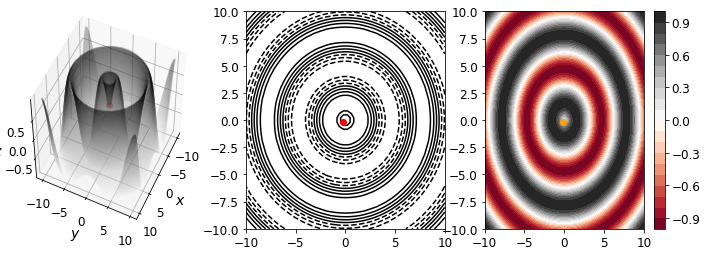

In [0]:
fig = plt.figure(figsize=plt.figaspect(0.33))

ax1 = fig.add_subplot(1,3,1, projection='3d')
ax1.contour3D(X, Y, Z3, 100, alpha= .2, cmap='binary')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

# calc index of min Z value
xmin, ymin = np.unravel_index(np.argmin(Z1), Z3.shape)

# plot local minimum point
ax1.plot([X[xmin,ymin]], [Y[xmin,ymin]], [0.3], marker="o", ls="", c="red")
ax1.view_init(50, 25)

ax2 = fig.add_subplot(1,3,2)
plt.contour(X, Y, Z3, colors='black')
plt.plot([X[xmin,ymin]], [Y[xmin,ymin]], marker="o", ls="", c="red")

ax3 = fig.add_subplot(1,3,3)
plt.contourf(X, Y, Z3, 20, cmap='RdGy')
plt.colorbar()
plt.plot([X[xmin,ymin]], [Y[xmin,ymin]], marker="o", ls="", c="orange");

#Problem 2

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
np.random.seed(42)

m = 100
Xs = 2 * np.random.rand(m, 2)

X1 = np.array([Xs[:,0]]).T
X2 = np.array([Xs[:,1]]).T

y = 4 + 3 * X1 + 3 * X2 + np.random.rand(m, 1)

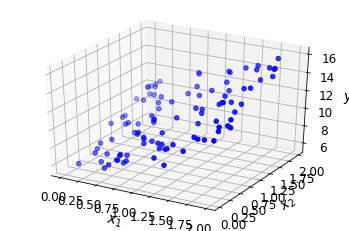

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, y, c='b', marker='o');
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$');

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), Xs])

In [7]:
print(X_b.shape)

(100, 3)


In [8]:
# show the first 5 rows
print(X_b[:5, :])

[[1.         0.74908024 1.90142861]
 [1.         1.46398788 1.19731697]
 [1.         0.31203728 0.31198904]
 [1.         0.11616722 1.73235229]
 [1.         1.20223002 1.41614516]]


# Linear regression using numpy


In [0]:
# number of epochs
epochs = 20

# learning rate
lr = 0.01

In [10]:
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1)
print(initial_weight)

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]


In [12]:
# sanity check (I will use this to explain how the vectorized code works)
print(initial_weight.shape)
print(y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)

(3, 1)
(100, 1)
(100, 1)
(3, 1)


In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)                  

In [15]:
weight_path_mgd[-1]

array([[3.90426654],
       [3.21208371],
       [3.34736451]])

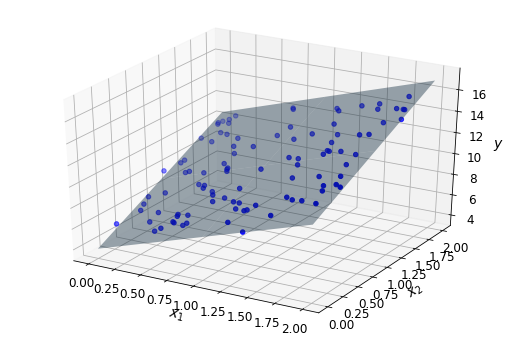

In [17]:
# plane calculation
k = 3 #size of the plane

x1, x2 = np.mgrid[:k, :k]

X = np.hstack(( np.reshape(x1, (k*k, 1)), np.reshape(x2, (k*k, 1))))
X = np.hstack(( np.ones((k*k, 1)), X))

y_predict = np.reshape(np.dot(X, weight), (k, k))

#plotting
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')

ax.scatter(X1, X2, y, c='b', marker='o')
ax.plot_surface(x1, x2, y_predict, alpha=0.4) #plane plot

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$');

## Problem 3

In [18]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_tot = np.concatenate((x_train, x_test))
y_tot = np.concatenate((y_train, y_test))

TensorFlow 2.x selected.
11493376/11490434 [==============================] - 0s 0us/step


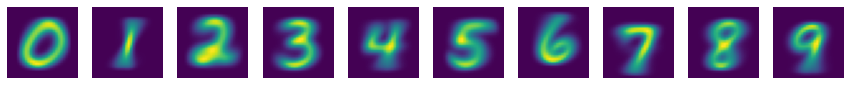

In [19]:
plt.figure(figsize=(15,3))
for i in range(10):
    avgImg = np.average(x_tot[y_tot==i],0)
    plt.subplot(1, 10, i+1)
    plt.imshow(avgImg.reshape((28,28))) 
    plt.axis('off')
plt.show()